# Part I - (PISA DATA)
## by (Glendah Nyabuto)

## Introduction

The Programme for International Student Assessment (PISA) is a global study conducted by the Organization for Economic Cooperation and Development (OECD) in member and non-member countries to assess educational systems by assessing 15-yearold school students academic performance in mathematics, science, and reading. This datasets contains information on their scores and other socioeconomic characteristics, information about their school and its infrastructure, as well as the countries that are taking part in the program.

Therefore, PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school.

The dataset contains the full set of responses from individual students, school principals and parents.The dataset includes background questionnaires, data files in ASCII format (from 2000 to 2012), codebooks, compendia and SAS™ and SPSS™ data files in order to process the data. [Click here](https://www.google.com/url?q=https://www.google.com/url?q%3Dhttps://s3.amazonaws.com/udacity-hosted-downloads/ud507/pisa2012.csv.zip%26amp;sa%3DD%26amp;ust%3D1581581520574000&sa=D&source=editors&ust=1657666635096756&usg=AOvVaw3pIm8M-J9qD2C_2QQD_meJ) to access the dataset. Here is the [Data Dictionary](https://www.google.com/url?q=https://www.google.com/url?q%3Dhttps://s3.amazonaws.com/udacity-hosted-downloads/ud507/pisadict2012.csv%26sa%3DD%26ust%3D1554482573645000&sa=D&source=editors&ust=1657666635097914&usg=AOvVaw1EyGTf-NZEPpHThbLU95o9) that describes the ASCII formats used to process the data. 

Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science representing about 28 million 15-year-olds globally. Of those economies, 44 took part in an assessment of creative problem solving and 18 in an assessment of financial literacy.

Idividual identifiable infomation in the dataset include demographic and socioeconomic information about students (e.g., gender, birth month and year, parents’ occupation and education level) and also response to survey and test questions, and information about students’ performance on PISA


The PISA data can be useful in research on causal factors within or across education systems, in comparing education systems, institutional autonomy and admissions policies, and also allow typologies to be developed that can be used for comparative statistical analyses of education performance indicators, thereby identifying the consequences of different policy choices. They have also enable the generation of new  knowledge about education.

In this project, we are going to use Visualization to depict findings that will challenge deeply embedded educational practices in overal perfomance



## Preliminary Wrangling


In [103]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import sqlite3
from zipfile import ZipFile

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

> ## Gathering

 and describe its properties through the questions below. Try and motivate your exploration goals through this section.

The data is available here: [Amazon Web Services](https://s3.amazonaws.com/udacity-hosted-downloads/ud507/pisa2012.csv.zip)
- The data is available as a zip file
- Use the zipfile  liblary to extract the contents of the zip file
- The content is a csv file

<font color='red'>NOTE:</font>
<p> The dataset is very large, about <i><strong><font color='blue'>2.75 GB.</font></strong></i> so it will take a few minutes atleast 1 minute to execute the results</p>


In [104]:
'''



  
# specifying the zip file name
file_name = "pisa2012.csv.zip"
  
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
  
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')



'''


'\n\n\n\n  \n# specifying the zip file name\nfile_name = "pisa2012.csv.zip"\n  \n# opening the zip file in READ mode\nwith ZipFile(file_name, \'r\') as zip:\n    # printing all the contents of the zip file\n    zip.printdir()\n  \n    # extracting all the files\n    print(\'Extracting all the files now...\')\n    zip.extractall()\n    print(\'Done!\')\n\n\n\n'

> Since the file has been extracted, to avoid overwritting incase the code is executed again, comment it

Since the file is very large and loading it directly to the workspace will bring a merrory error and also it might take atleast 30minutes, its goot if its stored in database.
- Use sqlite3 library to connect to a database
- Use pandas to read the CSV file
- Note that you have to specify the `chucksize` since the dataset has very many record
- Then convert the chunk files to sql. Since the data has been cut in to several chunks, Append the them in to one database

<font color='red'>NOTE:</font>
<p> As mentioned above the dataset is very large, so it might take at lieast <i><strong><font color='orange'>5 minutes</font></strong></i>to finish the execution</p>


In [105]:
'''



# Create a new database file:
db = sqlite3.connect("pisa.sqlite")

chunk_size=50000
batch_no=1
for chunk in pd.read_csv('pisa2012.csv', chunksize=chunk_size, encoding='unicode_escape'):
    chunk.to_sql("pisa", db, if_exists="append")
    batch_no+=1

db.execute("CREATE INDEX CNT ON pisa(CNT)") 
db.close()



'''

'\n\n\n\n# Create a new database file:\ndb = sqlite3.connect("pisa.sqlite")\n\nchunk_size=50000\nbatch_no=1\nfor chunk in pd.read_csv(\'pisa2012.csv\', chunksize=chunk_size, encoding=\'unicode_escape\'):\n    chunk.to_sql("pisa", db, if_exists="append")\n    batch_no+=1\n\ndb.execute("CREATE INDEX CNT ON pisa(CNT)") \ndb.close()\n\n\n\n'

> Since the database has been created, to avoid overwritting incase the code is executed again, comment the code.

Now that the data is avaibale in the database, its easy to extract the columns that we need.
- Use the sqlite3 library to connect to the database
- Use sql SELECT statement to select the columns that are required for project
- Then use pandas library to read the columns selected.
- Store as a dataframe object

<font color='red'>NOTE:</font>
<p> As mentioned above the dataset is very large, so it might take at least <i><strong><font color='orange'>2 minutes</font></strong></i>to finish the execution in selecting the columns from the database</p>

In [106]:
'''


# 
conn = sqlite3.connect("pisa.sqlite")
x = "SELECT CNT, STRATUM, OECD,STIDSTD as STUDENT_ID, ST01Q01 as INTERNATIONAL_GRADE, ST04Q01 as GENDER, ST11Q01 as MOTHER_THERE, ST11Q02 as FATHER_THERE, ST13Q01 as MOTHER_EDUCATED, ST15Q01 as MOTHER_WORKING_STATUS, ST17Q01 as FATHER_EDUCATED, ST19Q01 as FATHER_WORKING_STATUS, ST27Q01 as CELL_PHONES, ST27Q02 as TELEVISIONS, ST27Q03 as COMPUTER, ST86Q01 as CLASSROOM_MANAGEMENT, ST88Q01 as ATTITUDE_TOWARDS_SCHOOL, MMINS as MIN_READING_PER_WEEK, USESCH as ICT_IN_SCHOOL, WEALTH, PV1MATH as MATH_PLAUSE_VALUE, PV1READ as READING_PLAUSE_VALUE, PV1SCIE as SCIENCE_PLAUSE_VALUE FROM pisa"

df = pd.read_sql_query(x, conn)
df.to_csv('Pisa_Data.csv')


'''

'\n\n\n# \nconn = sqlite3.connect("pisa.sqlite")\nx = "SELECT CNT, STRATUM, OECD,STIDSTD as STUDENT_ID, ST01Q01 as INTERNATIONAL_GRADE, ST04Q01 as GENDER, ST11Q01 as MOTHER_THERE, ST11Q02 as FATHER_THERE, ST13Q01 as MOTHER_EDUCATED, ST15Q01 as MOTHER_WORKING_STATUS, ST17Q01 as FATHER_EDUCATED, ST19Q01 as FATHER_WORKING_STATUS, ST27Q01 as CELL_PHONES, ST27Q02 as TELEVISIONS, ST27Q03 as COMPUTER, ST86Q01 as CLASSROOM_MANAGEMENT, ST88Q01 as ATTITUDE_TOWARDS_SCHOOL, MMINS as MIN_READING_PER_WEEK, USESCH as ICT_IN_SCHOOL, WEALTH, PV1MATH as MATH_PLAUSE_VALUE, PV1READ as READING_PLAUSE_VALUE, PV1SCIE as SCIENCE_PLAUSE_VALUE FROM pisa"\n\ndf = pd.read_sql_query(x, conn)\ndf.to_csv(\'Pisa_Data.csv\')\n\n\n'

> In above illustrates selecting the required data from the database. Since the cell take like 3 minute we can comment it as we now have the data we requre.

Reading the csv file. 
- Use pandas to load the dataset
- set index to the `Unnamed:0` column that was generated as a column from indexing when selecting columns

In [107]:
pisa_data = pd.read_csv('Pisa_Data.csv').set_index('Unnamed: 0')



> ## Assessing

### What is the structure of your dataset?


In [108]:
#Previewing the first 5 records on the datasets
pisa_data.head()


,CNT,STRATUM,OECD,STUDENT_ID,INTERNATIONAL_GRADE,GENDER,MOTHER_THERE,FATHER_THERE,MOTHER_EDUCATED,MOTHER_WORKING_STATUS,...,TELEVISIONS,COMPUTER,CLASSROOM_MANAGEMENT,ATTITUDE_TOWARDS_SCHOOL,MIN_READING_PER_WEEK,ICT_IN_SCHOOL,WEALTH,MATH_PLAUSE_VALUE,READING_PLAUSE_VALUE,SCIENCE_PLAUSE_VALUE
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,Albania,ALB0006,Non-OECD,1,10,Female,Yes,Yes,<ISCED level 3A>,"Other (e.g. home duties, retired)",...,One,None,Agree,Agree,NaN,NaN,-2.92,406.8469,249.5762,341.7009
1,Albania,ALB0006,Non-OECD,2,10,Female,Yes,Yes,<ISCED level 3A>,Working full-time <for pay>,...,Three or more,Three or more,NaN,NaN,270.0,NaN,0.69,486.1427,406.2936,548.9929
2,Albania,ALB0006,Non-OECD,3,9,Female,Yes,Yes,"<ISCED level 3B, 3C>",Working full-time <for pay>,...,Two,Two,NaN,NaN,NaN,NaN,-0.23,533.2684,401.2100,499.6643
3,Albania,ALB0006,Non-OECD,4,9,Female,Yes,Yes,"<ISCED level 3B, 3C>",Working full-time <for pay>,...,Two,One,NaN,NaN,135.0,NaN,-1.17,412.2215,547.3630,438.6796
4,Albania,ALB0006,Non-OECD,5,9,Female,Yes,Yes,She did not complete <ISCED level 1>,Working part-time <for pay>,...,One,Two,Agree,Disagree,NaN,NaN,-1.17,381.9209,311.7707,361.5628


In [109]:
#Previewing the last 5 records on the datasets
pisa_data.tail()

,CNT,STRATUM,OECD,STUDENT_ID,INTERNATIONAL_GRADE,GENDER,MOTHER_THERE,FATHER_THERE,MOTHER_EDUCATED,MOTHER_WORKING_STATUS,...,TELEVISIONS,COMPUTER,CLASSROOM_MANAGEMENT,ATTITUDE_TOWARDS_SCHOOL,MIN_READING_PER_WEEK,ICT_IN_SCHOOL,WEALTH,MATH_PLAUSE_VALUE,READING_PLAUSE_VALUE,SCIENCE_PLAUSE_VALUE
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
485485,Vietnam,VNM0317,Non-OECD,4955,10,Female,Yes,Yes,<ISCED level 2>,"Other (e.g. home duties, retired)",...,One,One,NaN,NaN,NaN,NaN,-2.04,477.1849,460.2272,559.8098
485486,Vietnam,VNM0317,Non-OECD,4956,10,Male,Yes,Yes,She did not complete <ISCED level 1>,"Other (e.g. home duties, retired)",...,Two,Three or more,Disagree,Agree,NaN,NaN,-0.58,518.9360,490.9325,538.7355
485487,Vietnam,VNM0317,Non-OECD,4957,10,Male,Yes,Yes,<ISCED level 1>,Working full-time <for pay>,...,One,None,Agree,Disagree,NaN,NaN,-2.04,475.2376,462.6239,536.8706
485488,Vietnam,VNM0317,Non-OECD,4958,10,Male,Yes,Yes,<ISCED level 2>,"Other (e.g. home duties, retired)",...,One,One,Agree,Disagree,NaN,NaN,-1.53,550.9503,505.2873,511.0407
485489,Vietnam,VNM0317,Non-OECD,4959,10,Female,Yes,No,She did not complete <ISCED level 1>,"Other (e.g. home duties, retired)",...,One,None,NaN,NaN,NaN,NaN,-1.59,470.0187,532.3506,530.6229


In [110]:
# The number of columns and rows
pisa_data.shape

(485490, 23)

In [111]:
#Checking for the info
pisa_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485490 entries, 0 to 485489
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CNT                      485490 non-null  object 
 1   STRATUM                  485490 non-null  object 
 2   OECD                     485490 non-null  object 
 3   STUDENT_ID               485490 non-null  int64  
 4   INTERNATIONAL_GRADE      485490 non-null  int64  
 5   GENDER                   485490 non-null  object 
 6   MOTHER_THERE             460559 non-null  object 
 7   FATHER_THERE             441036 non-null  object 
 8   MOTHER_EDUCATED          457979 non-null  object 
 9   MOTHER_WORKING_STATUS    467751 non-null  object 
 10  FATHER_EDUCATED          443261 non-null  object 
 11  FATHER_WORKING_STATUS    451410 non-null  object 
 12  CELL_PHONES              477079 non-null  object 
 13  TELEVISIONS              476548 non-null  object 
 14  COMP

In [112]:
#The column names
pisa_data.columns

Index(['CNT', 'STRATUM', 'OECD', 'STUDENT_ID', 'INTERNATIONAL_GRADE', 'GENDER',
       'MOTHER_THERE', 'FATHER_THERE', 'MOTHER_EDUCATED',
       'MOTHER_WORKING_STATUS', 'FATHER_EDUCATED', 'FATHER_WORKING_STATUS',
       'CELL_PHONES', 'TELEVISIONS', 'COMPUTER', 'CLASSROOM_MANAGEMENT',
       'ATTITUDE_TOWARDS_SCHOOL', 'MIN_READING_PER_WEEK', 'ICT_IN_SCHOOL',
       'WEALTH', 'MATH_PLAUSE_VALUE', 'READING_PLAUSE_VALUE',
       'SCIENCE_PLAUSE_VALUE'],
      dtype='object')

In [113]:
#Using the values counts function to observe the distribution of values
pisa_data.INTERNATIONAL_GRADE.value_counts()
# the values 96 is an outliers. 

10    262631
9     152850
11     38397
8      23764
7       3536
12      3436
96       873
13         3
Name: INTERNATIONAL_GRADE, dtype: int64

In [114]:
#Checking for duplicated
pisa_data.duplicated().sum()

0

> ## Cleaning

### The column names are in uppercase,, Converting the column names from uppercase to lowercase

Code

In [115]:
#Using the the str.lower finction to convert the uppercase to lower case
pisa_data.columns = pisa_data.columns.str.lower()

Test

In [116]:
#Previewing the columns
pisa_data.columns

Index(['cnt', 'stratum', 'oecd', 'student_id', 'international_grade', 'gender',
       'mother_there', 'father_there', 'mother_educated',
       'mother_working_status', 'father_educated', 'father_working_status',
       'cell_phones', 'televisions', 'computer', 'classroom_management',
       'attitude_towards_school', 'min_reading_per_week', 'ict_in_school',
       'wealth', 'math_plause_value', 'reading_plause_value',
       'science_plause_value'],
      dtype='object')

### THe columns mother educated and father educated has `<` and `>` characters. Remove then but using `str` methods

Code
> A function that will help optain the status for all columns

In [117]:
def replace_char(x):
    y = x.str.split(',', expand=True)[0].str.replace('<', '').str.replace('>', '').str.replace('She ', '').str.replace('He ', '').str.title()
    return y

In [118]:
# Removing from the mother educated columns
pisa_data.mother_educated = replace_char(pisa_data.mother_educated)


In [119]:
# Removing from the father educated columns
pisa_data.father_educated = replace_char(pisa_data.father_educated)

Test

In [120]:
#Printing the values from each of the columns
print(pisa_data.mother_educated.unique())
print(pisa_data.father_educated.unique())


['Isced Level 3A ' 'Isced Level 3B' 'Did Not Complete Isced Level 1 '
 'Isced Level 2 ' 'Isced Level 1 ' nan]
['Isced Level 3A ' 'Isced Level 3B' 'Isced Level 2 '
 'Did Not Complete Isced Level 1 ' nan 'Isced Level 1 ']


### The columns `mother_working` and `father_working` have working status that should be extracted

Code
> A function that will help optain the status for all columns

In [121]:
def working(m):
    n = m.str.split('<', expand=True)[0].str.split('(', expand=True)[0].str.split(',', expand=True)[0]
    return n

In [122]:
# Extracting for Mother_working column
pisa_data.mother_working_status = working(pisa_data.mother_working_status)

In [123]:
#Extracting for father_working column
pisa_data.father_working_status = working(pisa_data.father_working_status)

Test

In [124]:
# Display the values counts for each ocolumns
print(pisa_data['mother_working_status'].value_counts())
print('----------------------------------------------------------------------------------')
print(pisa_data['father_working_status'].value_counts())

Working full-time     219095
Other                 138841
Working part-time      78237
Not working            31578
Name: mother_working_status, dtype: int64
----------------------------------------------------------------------------------
Working full-time     339697
Working part-time      49503
Other                  40588
Not working            21622
Name: father_working_status, dtype: int64


### Some columns have object datatype instead of categorical datatype including `['oecd', 'international_grade', 'gender','mother_there', 'father_there', 'mother_educated','mother_working_status', 'father_educated', 'father_working_status', 'classroom_management','attitude_towards_school']`

Code

In [125]:
#Changing the datatypes of the columns to category datatype
cols= ['oecd', 'international_grade', 'gender','mother_there', 'father_there', 'mother_educated','mother_working_status', 'father_educated', 'father_working_status', 'classroom_management','attitude_towards_school']
for col in cols:
    pisa_data[col] = pisa_data[col].astype('category')

Test

In [126]:
#Using the info function to check for the dattypes on the dataframe
pisa_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485490 entries, 0 to 485489
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   cnt                      485490 non-null  object  
 1   stratum                  485490 non-null  object  
 2   oecd                     485490 non-null  category
 3   student_id               485490 non-null  int64   
 4   international_grade      485490 non-null  category
 5   gender                   485490 non-null  category
 6   mother_there             460559 non-null  category
 7   father_there             441036 non-null  category
 8   mother_educated          457979 non-null  category
 9   mother_working_status    467751 non-null  category
 10  father_educated          443261 non-null  category
 11  father_working_status    451410 non-null  category
 12  cell_phones              477079 non-null  object  
 13  televisions              476548 non-null  ob

### The International_grade has outlires wich were generated as a result of wromg input, instead of `9, 96` was inputed and `3` of the values ate allocated `13`

Code

In [127]:
#Replacing the values that have 96 by 9
pisa_data.international_grade = pisa_data.international_grade.apply(lambda x: 9 if x == 96 else x)

Test

In [128]:
#Cheackin if the values were replaced by selecting records whose international grade is 96
pisa_data[pisa_data['international_grade'] == 96]

,cnt,stratum,oecd,student_id,international_grade,gender,mother_there,father_there,mother_educated,mother_working_status,...,televisions,computer,classroom_management,attitude_towards_school,min_reading_per_week,ict_in_school,wealth,math_plause_value,reading_plause_value,science_plause_value
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,


### The columns `'cell_phones', 'televisions', 'computer'` have values that can be represented as digital devices

Code

> A function that will help input integer values to the columns

In [129]:
def value_placement(x):
    col = x.apply(lambda x: 1 if x == 'One' else 2 if x =='Two' else 3 if x =='Three or more' else 0)
    return col

In [130]:
#Inputing the values
pisa_data.cell_phones = value_placement(pisa_data.cell_phones)
pisa_data.televisions = value_placement(pisa_data.televisions)
pisa_data.computer = value_placement(pisa_data.computer)

Test

In [131]:
#Collecting a sample from the dataframe to see if the values were changes
pisa_data[['cell_phones', 'televisions', 'computer']].sample(5)

,cell_phones,televisions,computer
Unnamed: 0,,,
306459,3,2,2
13318,1,2,1
26553,3,3,1
174154,3,1,3
416300,3,2,3


In [132]:
# Converming the datatype of the columns to be integer
pisa_data[['cell_phones', 'televisions', 'computer']].dtypes

cell_phones    int64
televisions    int64
computer       int64
dtype: object

### The columns min_reading_per_week has missilng  values

Code
> Filling the nulls using a foward and barkward method. This will reduce biaseness

In [133]:
#Filling the nulls
pisa_data.min_reading_per_week.fillna(method='ffill', inplace=True)
pisa_data.min_reading_per_week.fillna(method='bfill', inplace=True)

Test

In [134]:
#Checking for nulls
pisa_data.min_reading_per_week.isnull().sum()

0

### Other values in the `itc_in_school` column are negative values. Creating categories from absolute values

Code

In [135]:
#Find the absolute values, round off to the nearest interger and converting the column to categorical
pisa_data.ict_in_school = pisa_data.ict_in_school.abs().round(0).fillna(0.0).astype(int).astype('category')

Test

In [136]:
#Checking for the datypes
pisa_data.ict_in_school.dtype

CategoricalDtype(categories=[0, 1, 2, 3, 4], ordered=False)

### Adding a  new column for the total number of digital devices

Code
> adding the total number of devices and dropiing the computer, cell_phones and television columns

In [137]:
#Creating another column for total digital digital devices
pisa_data.eval('digital_devices = cell_phones + televisions + computer', inplace=True)

In [138]:
#Dropping the 'cell_phones', 'televisions', 'computer' columns
pisa_data.drop(columns=['cell_phones', 'televisions', 'computer'], inplace=True)

In [139]:
pisa_data.digital_devices = pisa_data.digital_devices.astype('category')

Test

In [140]:
pisa_data.digital_devices.dtype

CategoricalDtype(categories=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], ordered=False)

In [141]:
#Printing column names
pisa_data.columns

Index(['cnt', 'stratum', 'oecd', 'student_id', 'international_grade', 'gender',
       'mother_there', 'father_there', 'mother_educated',
       'mother_working_status', 'father_educated', 'father_working_status',
       'classroom_management', 'attitude_towards_school',
       'min_reading_per_week', 'ict_in_school', 'wealth', 'math_plause_value',
       'reading_plause_value', 'science_plause_value', 'digital_devices'],
      dtype='object')

### A Creating a column for average perfomance from `math_plause_value	reading_plause_value	science_plause_value`

Code

In [142]:
# Creating a column for average perfomance
pisa_data.eval('average_perfomance = (math_plause_value	+ reading_plause_value + science_plause_value)/3', inplace=True)

Test

In [143]:
#Convertning the changes
pisa_data[pisa_data.average_perfomance != (pisa_data.math_plause_value + pisa_data.reading_plause_value + pisa_data.science_plause_value)/3]

,cnt,stratum,oecd,student_id,international_grade,gender,mother_there,father_there,mother_educated,mother_working_status,...,classroom_management,attitude_towards_school,min_reading_per_week,ict_in_school,wealth,math_plause_value,reading_plause_value,science_plause_value,digital_devices,average_perfomance
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,Albania,ALB0006,Non-OECD,1,10,Female,Yes,Yes,Isced Level 3A,Other,...,Agree,Agree,270.0,0,-2.92,406.8469,249.5762,341.7009,3,332.708000
3,Albania,ALB0006,Non-OECD,4,9,Female,Yes,Yes,Isced Level 3B,Working full-time,...,NaN,NaN,135.0,0,-1.17,412.2215,547.3630,438.6796,6,466.088033
5,Albania,ALB0006,Non-OECD,6,9,Female,Yes,Yes,Isced Level 3B,Not working,...,Agree,Agree,135.0,0,-0.95,396.3312,378.2544,384.3156,4,386.300400
6,Albania,ALB0006,Non-OECD,7,10,Female,Yes,Yes,Isced Level 3B,Working full-time,...,Strongly agree,Agree,225.0,0,-0.95,438.0823,373.2503,508.1499,6,439.827500
9,Albania,ALB0005,Non-OECD,10,10,Female,Yes,Yes,Isced Level 3A,Other,...,Agree,Strongly disagree,90.0,0,-1.82,463.6314,454.5082,404.2708,7,440.803467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485469,Vietnam,VNM0317,Non-OECD,4939,10,Female,Yes,Yes,Did Not Complete Isced Level 1,Working full-time,...,NaN,NaN,315.0,0,-2.33,414.7920,456.0968,527.2659,4,466.051567
485473,Vietnam,VNM0317,Non-OECD,4943,10,Female,Yes,Yes,Isced Level 1,Working full-time,...,NaN,NaN,270.0,0,-1.29,458.9578,443.3879,456.6766,5,453.007433
485475,Vietnam,VNM0317,Non-OECD,4945,10,Male,Yes,Yes,Did Not Complete Isced Level 1,Working part-time,...,Disagree,Agree,315.0,0,-2.04,439.1728,481.9507,494.9086,5,472.010700


### The structure of the dataset
> 

In [144]:
pisa_data.shape

(485490, 22)

> The dataset has 485490 records 22 columns

### What is/are the main feature(s) of interest in your dataset?

#### 

Average Perfomance

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?


> Demographic and socioeconomic information about students (e.g., gender, birth month and year, parents’ occupation and education level), Teacher classroom practices and the attitude of sutends towards school

Export the clean dataset

In [145]:
pisa_data.to_csv('pisa.csv')

## Univariate Exploration

Loading the clean data for exploration

In [146]:
pisa = pd.read_csv('pisa.csv')

In [147]:
#Matplotlip graphic style
plt.style.use('ggplot')

> Creting a function for visualizing bar plots for univariate exploration

In [148]:
def uni_bar(df, values, title, xlab, ylab):
#Creating the figure size
    plt.figure(figsize=(10,6), dpi=100)
#Setting the color
    base_color = sb.color_palette()[1]
#Plotting using seabon
    ax = sb.countplot(data = df, x=values, color=base_color)
    for i in ax.patches:
        ax.annotate('{:.0f}'.format(i.get_height()), (i.get_x()+ i.get_width()/2, i.get_height()+0.05), ha='center', va='bottom')

#Setting the title
    plt.title(title)
#Labeling the x and y axiz  
    plt.xlabel(xlab)
    plt.ylabel(ylab)

# Dsiplay the plot
    plt.show()

### Illustrate the frequency of Non-OECD OECD countries

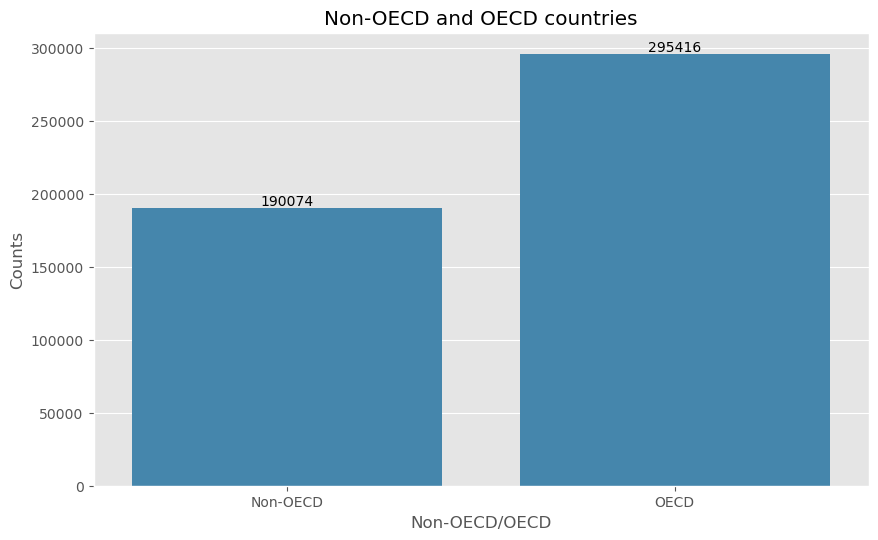

In [149]:
#Using the uni_bar function to plot bar plot for Non-OECD/OECD countries
uni_bar(pisa, 'oecd', 'Non-OECD and OECD countries', 'Non-OECD/OECD', 'Counts')

> The OECD (Organization for Economic Co-operation and Development) countries has the most number of student perfomance with `295416` student records which is about `60%` of the populationa where as the Non-OECd(Non-Organization for Economic Co-operation and Development) has few of student perfomance with `190074` which is about `40%` of the population. 

### Illustrate the diffrence in distribution by Gender

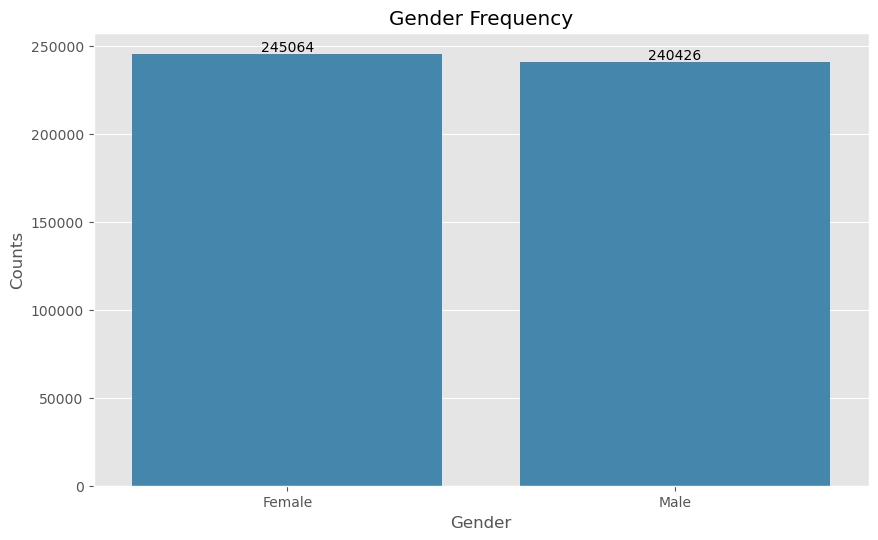

In [150]:
#Using the uni_bar function to plot bar plot for gender
uni_bar(pisa, 'gender', 'Gender Frequency', 'Gender', 'Counts')

> Female are slitely more than male by about `0.956` persentage. This explains that gender equality was observed in the process of collecting this data

### Illustrate the distribution of  `average_perfomance

In [151]:
#Creating a function to help plot the distribution on math_plaues_value, reading_plause_values and science_plause_values
def hist_destribution(data, x, range, titles):
    bins = np.arange(0, range.max()+20, 20)      # Creating the bins for the histogram
    color=sb.color_palette()[1]       #Adding color
    sb.displot(data, x=x, height=7.0, aspect=2.0, bins=bins, kde = True, color=color);  #Ploting the displot
    plt.title(titles, fontdict={'fontsize': 20, 'fontweight': 'medium'})     # adding a tittle
    plt.xlabel(x.replace('_' ,' ').title(), fontdict={'fontsize': 16, 'fontweight': 'medium'}) # X label

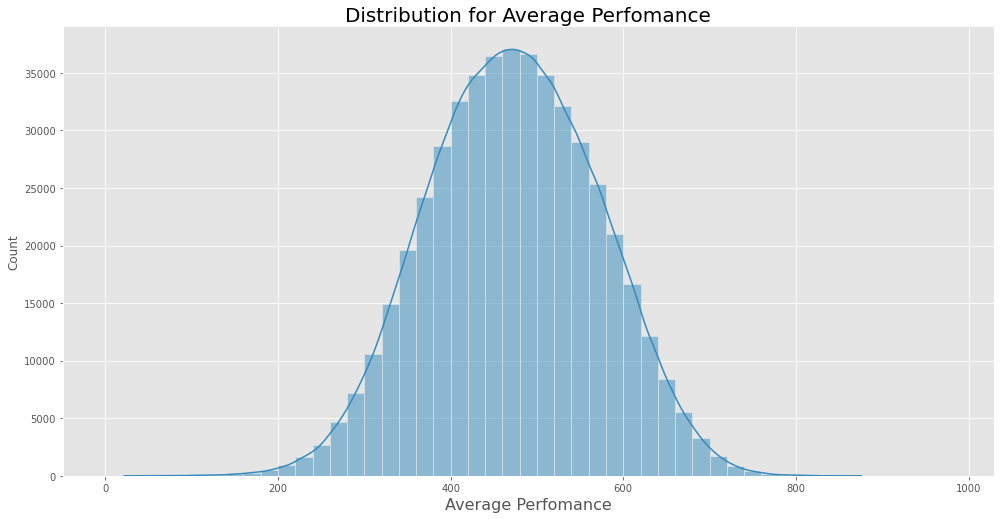

In [152]:
# Using the hist_destribution to plot a displot to show distribution for math plause 
hist_destribution(pisa, 'average_perfomance', pisa.math_plause_value, 'Distribution for Average Perfomance')

> The Distplot above depicts that the Averahe Perfomance is nomarly distributed. Most of the Average perfomance estimates are alighned near the Mean which is the mean of around 500. The graph presents a unimodal distribution having  one pick

### What frequency distribution of international grades

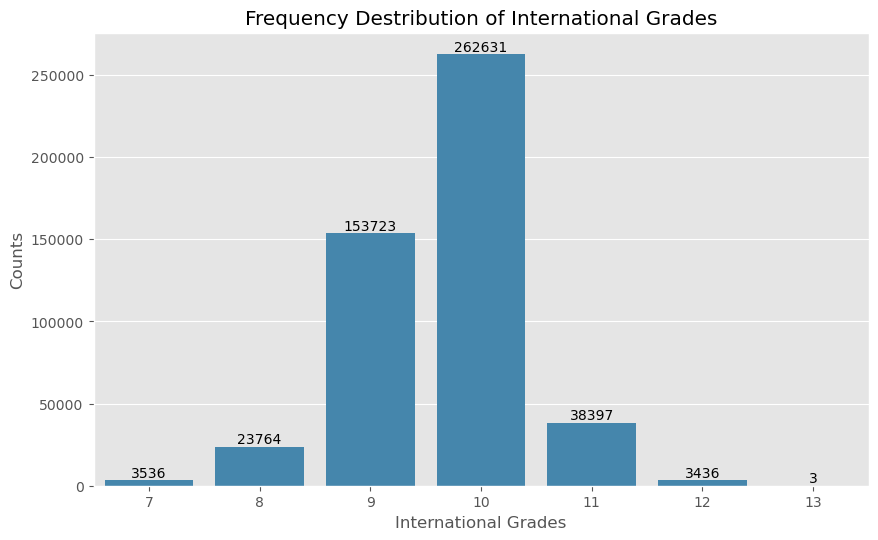

In [153]:
#Using uni_bar function to create a bar char that will illustrate the distribution of international grades
uni_bar(pisa,'international_grade', 'Frequency Destribution of International Grades', 'International Grades', 'Counts')


> 262631 of the students are given an estimate international grade of 10. This is like 54% of the total students. Fewer students are graded 13, 12 and 7 respectively.

### Observe the frequesncy distribution of Digital Devices In students homes

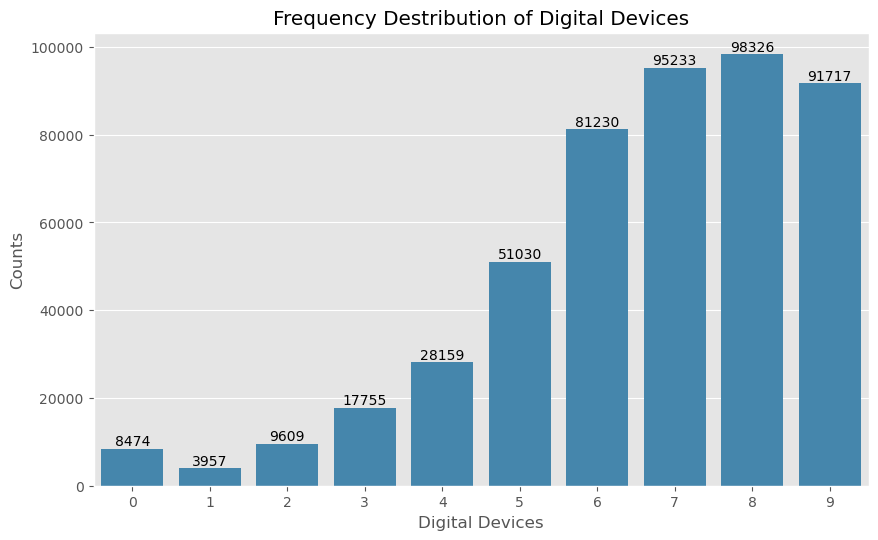

In [154]:
#Using uni_bar function to create a bar char that will illustrate the distribution of international grades
uni_bar(pisa,'digital_devices', 'Frequency Destribution of Digital Devices', 'Digital Devices', 'Counts')

Its is obeserved that more than `3/4` of the student have access to more than `6 digital devices` devices at home. But the fact that about `1.7` don't have access of digital devices ilustrates that there is inequality in IT integration

### Observe the frequesncy distribution Student access ICT in school

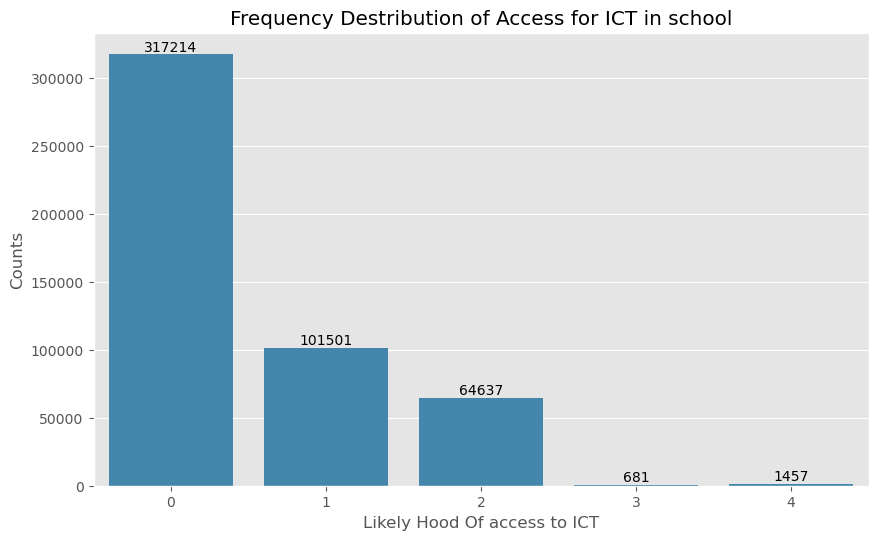

In [155]:
#Using uni_bar function to create a bar char that will illustrate the distribution of international grades
uni_bar(pisa,'ict_in_school', 'Frequency Destribution of Access for ICT in school', 'Likely Hood Of access to ICT', 'Counts')

> There is a huge inequality in ICT  integration in school. `317,214` student that is about `65%` 0f the population don't have access to ICT in there schools. `0.44%` enjoy the service of ICT integration while about `34%` compete for ICt resouces in schools

### Depict the the number of Students who have a Father and those tha don't have

In [156]:
#Ploting a pie chart
import matplotlib as mpl   
def pie_charts(size, labls, colrs, title):
    mpl.rcParams['font.size'] = 16.0     #The module rParams will help enlarge the font for the lables
    

    plt.figure(figsize=(6,6))
    plt.pie(size,labels=labls, colors=colrs, startangle=180, autopct='%1.1f%%')
    plt.title(title)
    plt.legend(loc=(1.04,0))
    plt.axis('equal')
    

<Figure size 720x720 with 0 Axes>

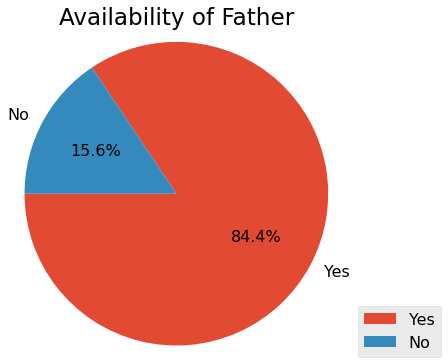

In [157]:
# Calling the function created (piechat) to create a pie chat to illustrate the students eho have a father and those who's fathers are not available
father_counts = pisa.father_there.value_counts()
labels = father_counts.index
colrs = sb.color_palette()[0:2]

plt.figure(figsize=(10,10))

pie_charts(father_counts, labels, colrs, 'Availability of Father');

> `84.4%` of the students have fathers while `15.6%` don't have a fathers

### Depict the the number of Students who have a Mother and those tha don't have

<Figure size 720x720 with 0 Axes>

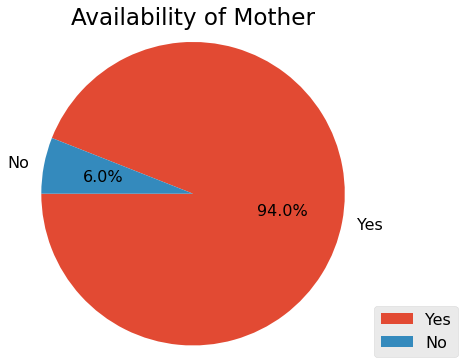

In [158]:
# Calling the function created (piechat) to create a pie chat to illustrate the students who have a mother and those who's mothers are not available
mother_counts = pisa.mother_there.value_counts()
labels = mother_counts.index
colrs = sb.color_palette()[0:2]

plt.figure(figsize=(10,10))

pie_charts(mother_counts, labels, colrs, 'Availability of Mother')

> `94.0%` of the students have mothers while `6.0%` don't have a mothers

### Represent the Fathers working status for students

<Figure size 864x864 with 0 Axes>

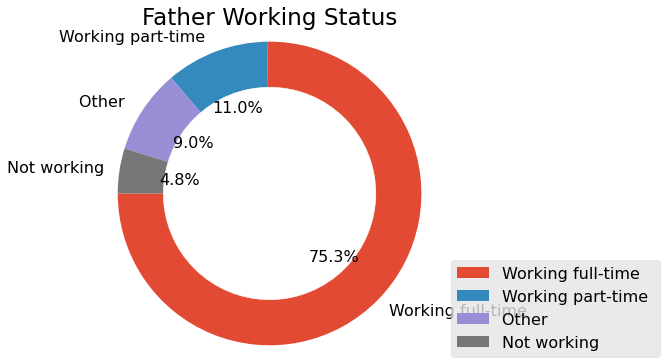

In [159]:
# WIth the help of the pie_chat function, creating a doghnut chart to representing the Fathers working status
father_working_counts = pisa.father_working_status.value_counts()
labels = father_working_counts.index
colrs = sb.color_palette()[0:4]

plt.figure(figsize=(12,12))

pie_charts(father_working_counts, labels, colrs, 'Father Working Status');
my_circle=plt.Circle( (0,0), 0.7, color='white')  # Creating a circle at the center
p=plt.gcf()
p.gca().add_artist(my_circle)

`75.3%` of student have working Fathers, `11.0%` of the students there fathers work part-time, `4.8%` there fathers don't work and the `9.0` of the students there fathers either have do home duties or have retired

### Represent the Mothers working status for students

<Figure size 720x720 with 0 Axes>

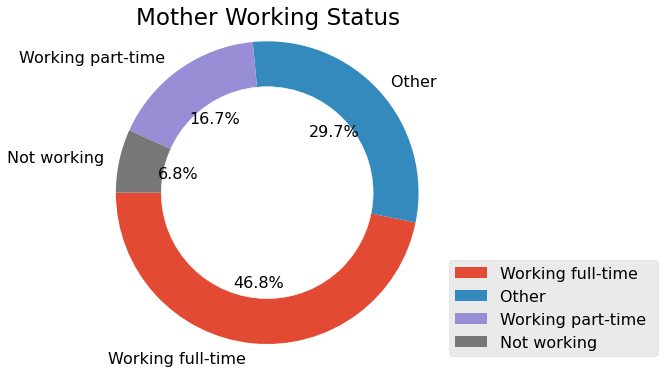

In [160]:
# WIth the help of the pie_chat function, creating a doghnut chart to representing the Mothers working status
mother_working_counts = pisa.mother_working_status.value_counts()
labels = mother_working_counts.index
colrs = sb.color_palette()[0:4]

plt.figure(figsize=(10,10))

pie_charts(mother_working_counts, labels, colrs, 'Mother Working Status')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle);

`46.8%` of student have working Mothers, `16,7%` of the students there Mothers work part-time, `6.8%` there Mothers don't work and the `9.0` of the students there Mothers either do home duties or have retired

### Education level of Mothers

<Figure size 1008x1008 with 0 Axes>

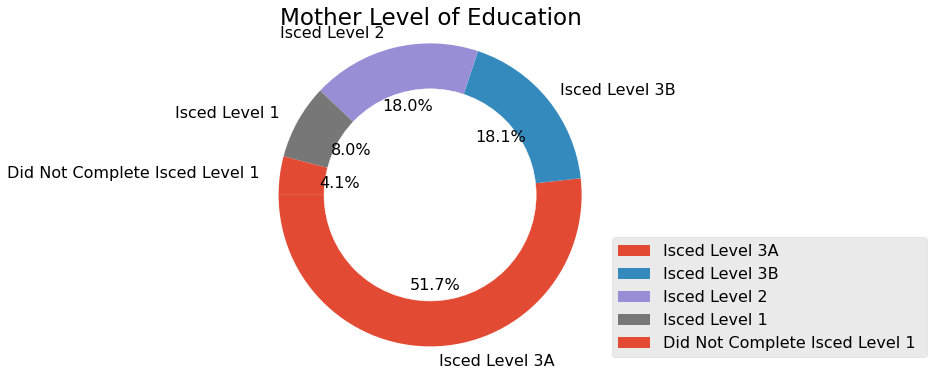

In [161]:
# WIth the help of the pie_chat function, creating a doghnut chart to representing the Mothers working status
mother_edu_counts = pisa.mother_educated.value_counts()
labels = mother_edu_counts.index
colrs = sb.color_palette()[0:4]

plt.figure(figsize=(14,14))

pie_charts(mother_edu_counts, labels, colrs, 'Mother Level of Education')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle);

> `18.1%` of the students' mothers appear to have completed `ISCED level 3B`, `51.7%` complited  `ISCED level 3A`. A small percentage of `4.1%` did not complete `ISCED level 1`

### Father education level

<Figure size 1008x1008 with 0 Axes>

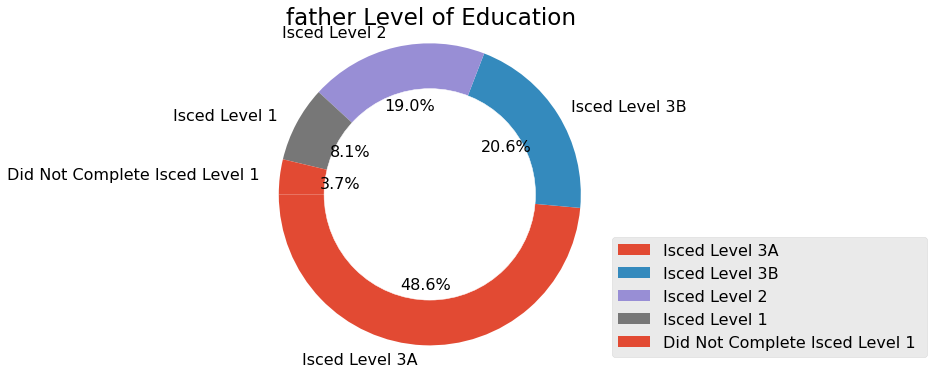

In [162]:
# WIth the help of the pie_chat function, creating a doghnut chart to representing the Mothers working status

father_edu_counts = pisa.father_educated.value_counts()
labels = father_edu_counts.index
colrs = sb.color_palette()[0:4]

plt.figure(figsize=(14,14))

pie_charts(father_edu_counts, labels, colrs, 'father Level of Education')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle);

> `20.6%` of the students' fathers appear to have completed `ISCED level 3B`, `48.6%` complited  `ISCED level 3A`. A small percentage of `3.7%` did not complete `ISCED level 1`

### Display students attitude towards school

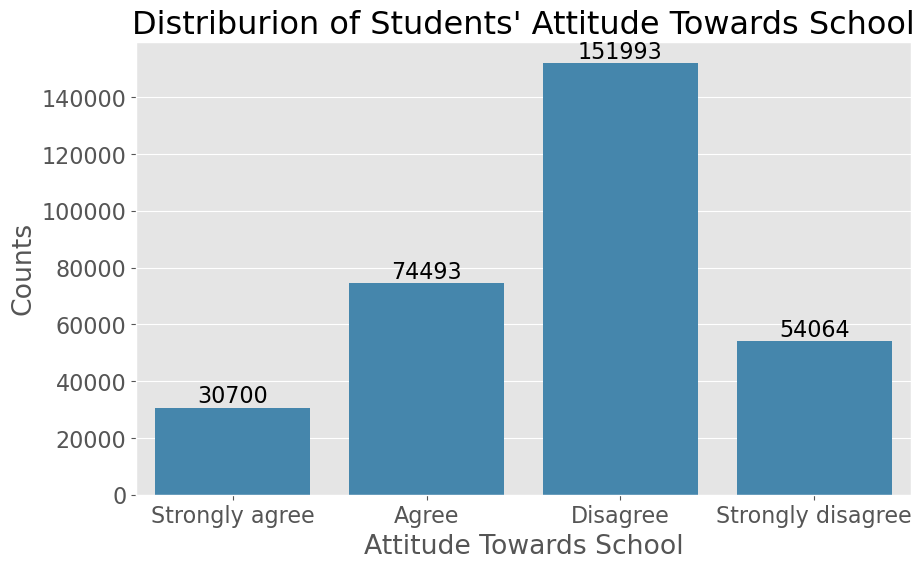

In [163]:
#Creating a barchat to diplay the distibution of the attitude of various towards school
categories_list = ['Strongly agree', 'Agree', 'Disagree', 'Strongly disagree']  # The categories in the 'attitude_towards_school' columns
orderd = pd.api.types.CategoricalDtype(ordered=True, categories=categories_list)   # Orderinf then according to the way they are arrange in the categories_list
pisa['attitude_towards_school'] = pisa['attitude_towards_school'] .astype(orderd);  # setting the column to have ordinal values

uni_bar(pisa, 'attitude_towards_school', "Distriburion of Students' Attitude Towards School", 'Attitude Towards School', 'Counts')

> It is disagreed that `151993` have a positive attitude towards school, `30700` students have a strongly agree and `74493` student have been awarded agree which as about `22.67%`

### Identify if teacher are using the appropriate Classroom management methods

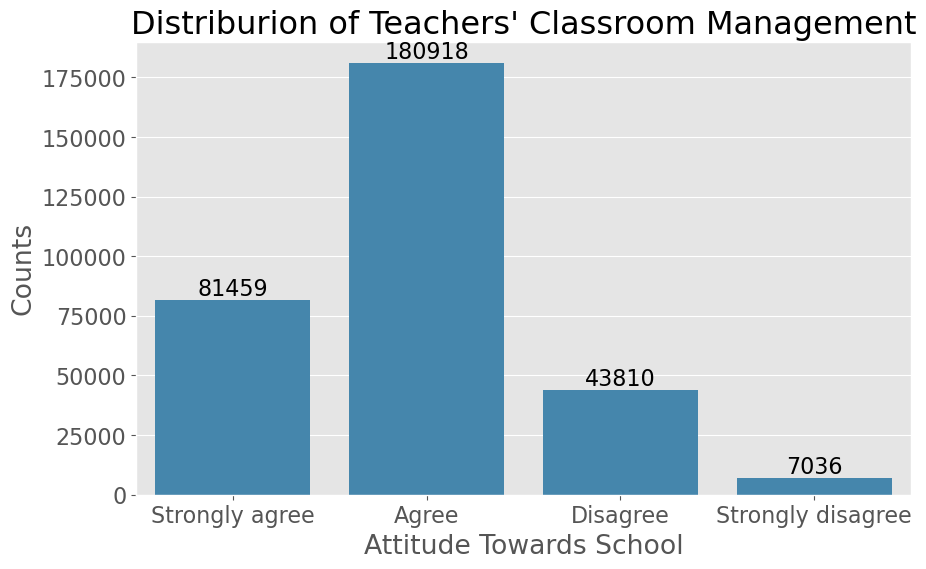

In [164]:
#Using a bar chat to display teacher's classroom managemet
cat_list = ['Strongly agree', 'Agree', 'Disagree', 'Strongly disagree']  # The categories in the 'classroom_management' column
orderd_list = pd.api.types.CategoricalDtype(ordered=True, categories=cat_list)  # Order the categories
pisa['classroom_management'] = pisa['classroom_management'] .astype(orderd_list);  # setting the column 'classroom_management' or ordinal categorical variable

uni_bar(pisa, 'classroom_management', "Distriburion of Teachers' Classroom Management", 'Attitude Towards School', 'Counts')

> About `37%` agree that teachers employ appropriate methods for classroom managament while about `17%` strongly. a small percentage of the population disagree and strongly disagree that the teacher employ approprate classroom management techniques

 No operation of scalling or transformation was perfomed in univariate analysis since the continious variable `Average perfomance` was nomarly distributed



## Bivariate Exploration


### Observing the realationship between Minutes reading per week and Studentsa average persomance

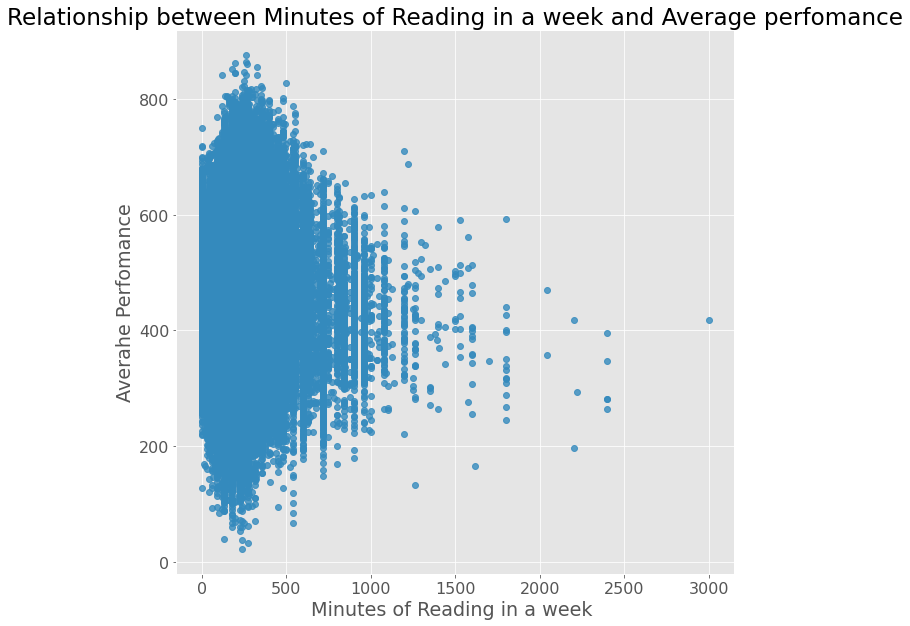

In [165]:
def bi_scatter():
    plt.figure(figsize=(10,10))
    base_colr = sb.color_palette()[1]
    sb.regplot(x = pisa['min_reading_per_week'], y = pisa['average_perfomance'],color= base_colr, fit_reg=False);
    plt.title('Relationship between Minutes of Reading in a week and Average perfomance')
    plt.ylabel('Averahe Perfomance')
    plt.xlabel('Minutes of Reading in a week ')

bi_scatter()

> Its depicted that there is a weak postive relationship bewtween the minutes a students reads per weak and the average perfomance

### What is ssociation between Gender and Average perfomance

In [166]:
def box1(df, x, y, title):
    bs_colr = sb.color_palette()[1]
    sb.boxplot(data = df, x = x, y = y, color=bs_colr)
    plt.title(title)
    plt.xlabel(x.replace('_', ' ').title())
    plt.ylabel(y.replace('_', ' ').title())
    plt.xticks(rotation = 30)

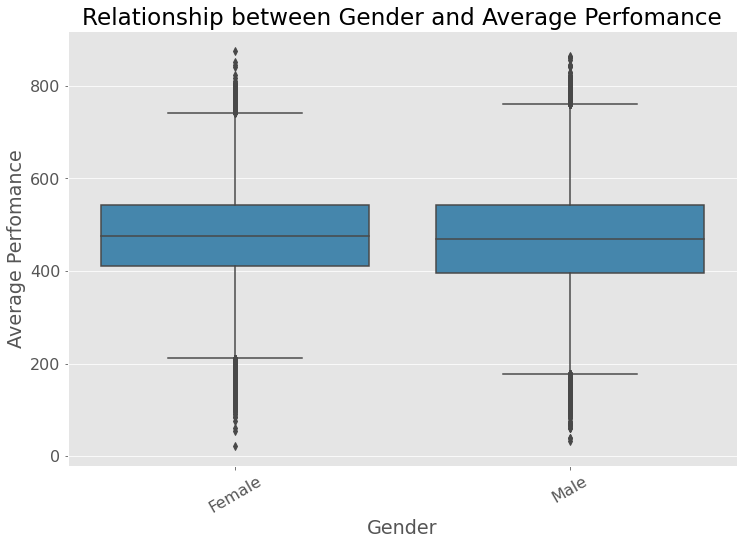

In [167]:
plt.figure(figsize=(12, 8))
box1(pisa, 'gender', 'average_perfomance', 'Relationship between Gender and Average Perfomance')

> Both gender are equal in terms perfomance, both have a mean of about `450`

### Does availability of a parent affect the perfomance of a student

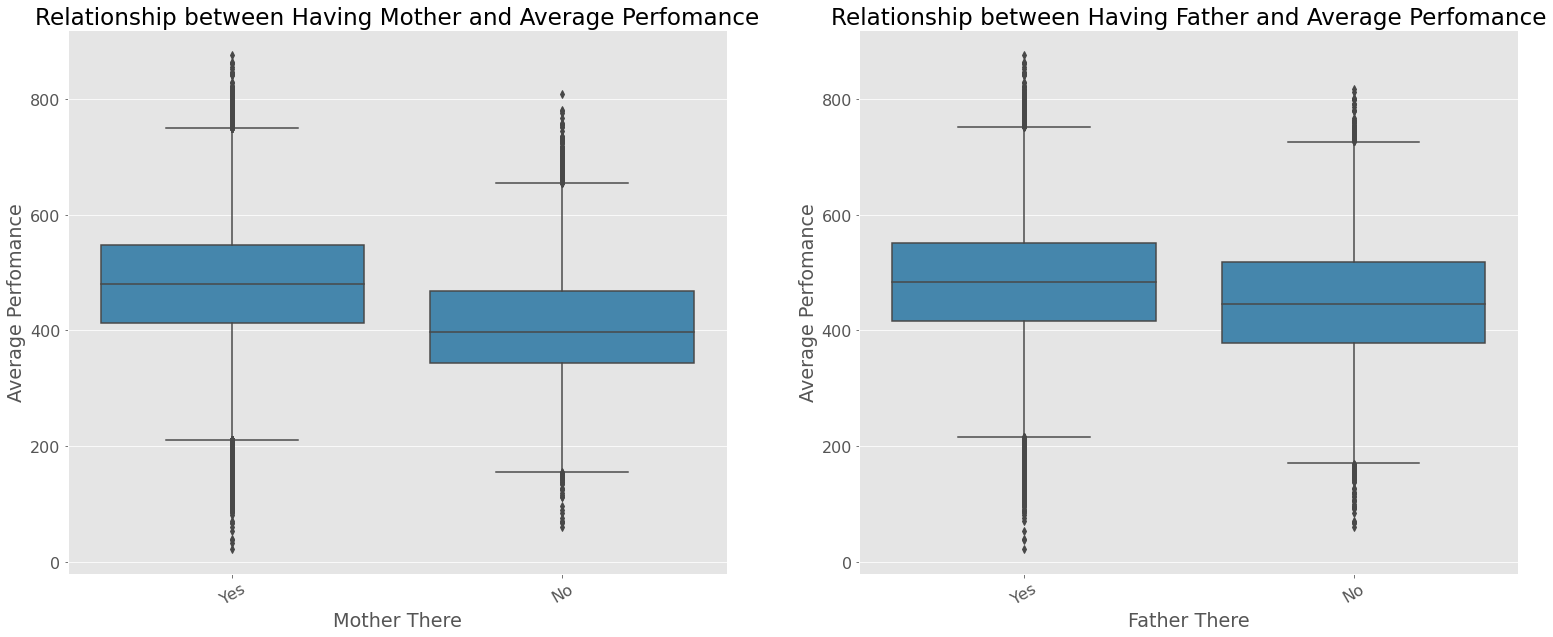

In [168]:
plt.figure(figsize=(26, 10))

plt.subplot(1, 2, 1)
ax1 = box1(pisa, 'mother_there', 'average_perfomance', 'Relationship between Having Mother and Average Perfomance')


plt.subplot(1, 2, 2)
box1(pisa, 'father_there', 'average_perfomance', 'Relationship between Having Father and Average Perfomance')



> Students Who have a parent fairly perfom well. In both instances its clear that students who have either of the parent perfom better. But those who dont have a mother seem to perfom very poor than those who dont have a father

### Does attitude towards school affect student perfomance

In [169]:
#Creating a function for a violin plot
def violin1(df, xvalue, yvalue, title):
    base_color = sb.color_palette()[1]
    sb.violinplot(data=df, x=xvalue, y=yvalue, color=base_color, inner='quartile')
    plt.title(title)
    plt.xlabel(xvalue.replace('_', ' ').title())
    plt.ylabel(yvalue.replace('_', ' ').title())

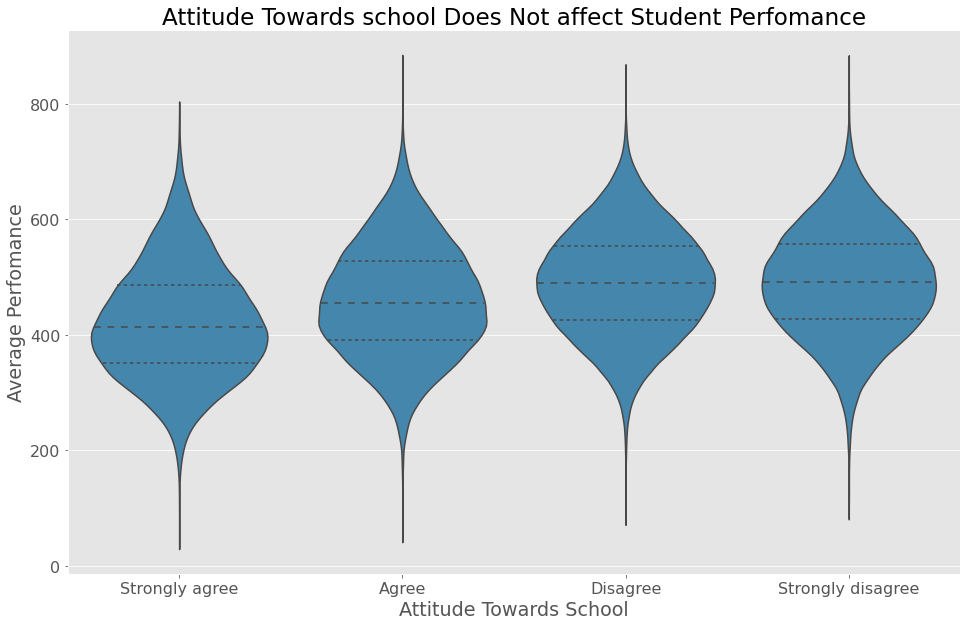

In [170]:
#Using the violin function to plot a visualization for attitude towards school and average perfomance
plt.figure(figsize=(16,10))


violin1(pisa,  'attitude_towards_school', 'average_perfomance', 'Attitude Towards school Does Not affect Student Perfomance')

> A few `strongly agree and agree` that attitude towards achool does not affect student perfomance while a higher population `disagree and strongly disagree` that towards achool does not affect student perfomance 

### Does Teacher' classroom practices affect student Average perfomance

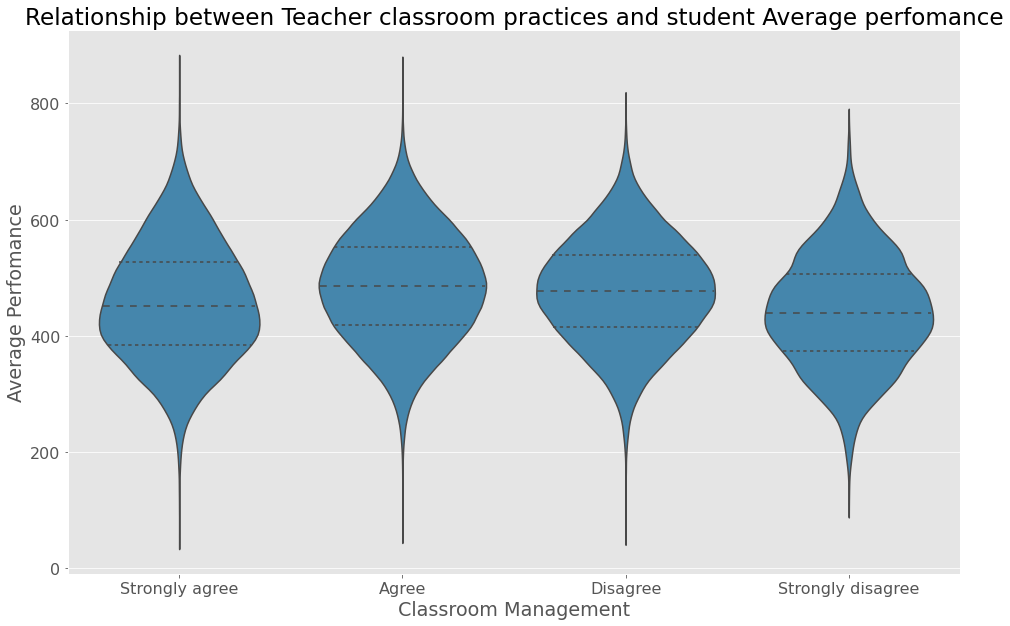

In [171]:
#Using the violin function to plot a visualization for Teacher class room practices and average perfomance

plt.figure(figsize=(16,10))

violin1(pisa, 'classroom_management', 'average_perfomance', 'Relationship between Teacher classroom practices and student Average perfomance')

> There is no signifiant relationship between Teacher classroom management and student average perfomance

### What is the relationship between Parent education and student perfomance

In [172]:
pisa['father_educated'] = pisa['father_educated'].astype('category')
pisa['mother_educated'] = pisa['mother_educated'].astype('category')

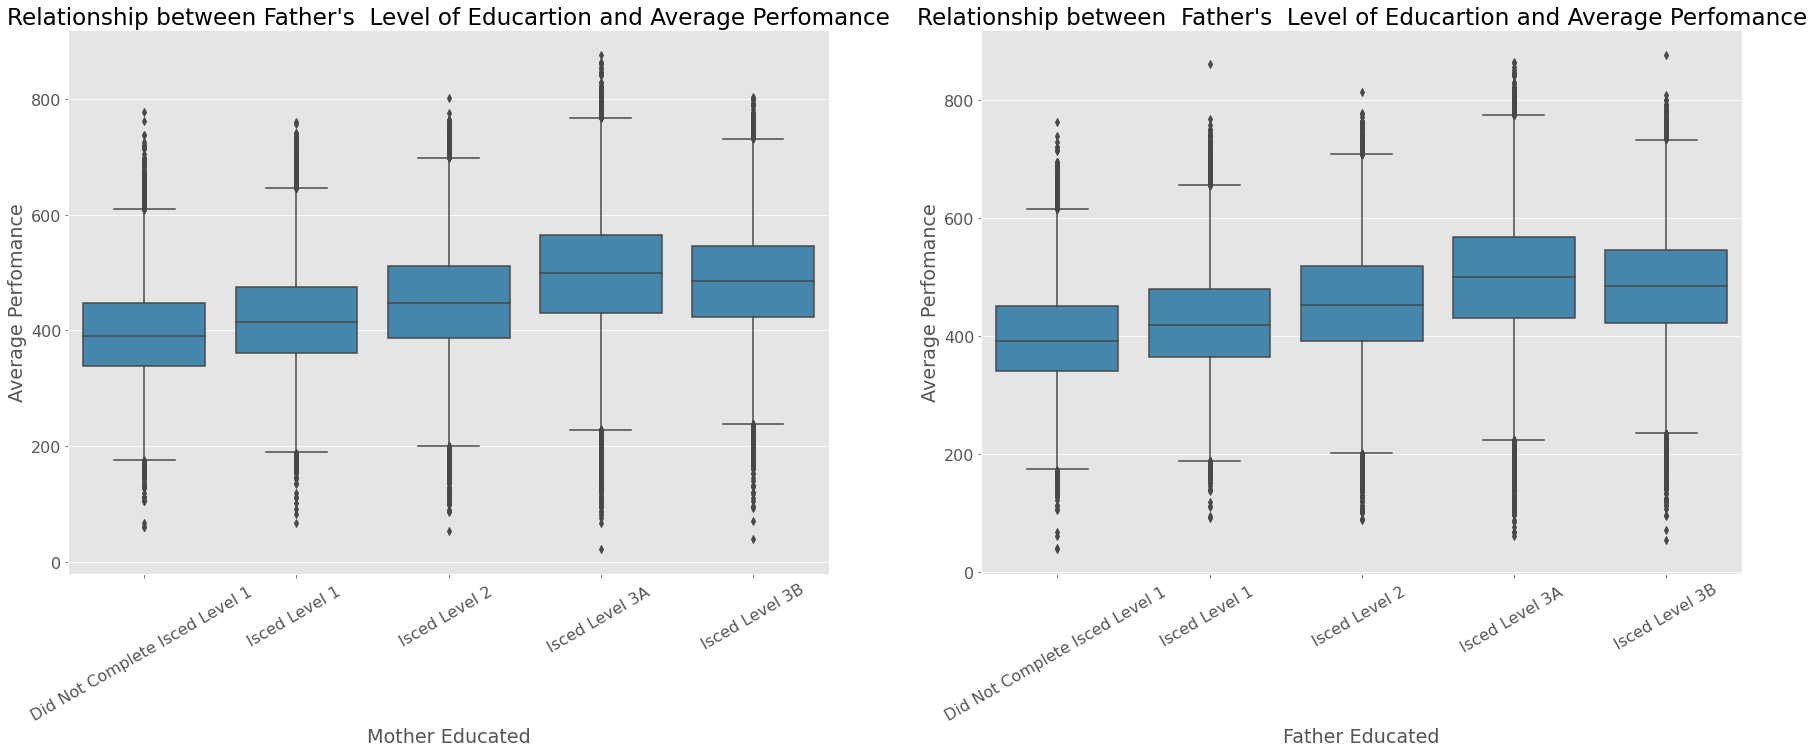

In [173]:
#Using the function for box plot to create subplots of boxpots to represent parents eucation and student perfomance
plt.figure(figsize=(30, 10))

plt.subplot(1, 2, 1)
ax1 = box1(pisa, 'mother_educated', 'average_perfomance', "Relationship between Father's  Level of Educartion and Average Perfomance")


plt.subplot(1, 2, 2)
box1(pisa, 'father_educated', 'average_perfomance', "Relationship between  Father's  Level of Educartion and Average Perfomance")




> Student's average perfomance increase with the increase in level of education of parents. From the above graphs its seen that those students whose mothers and Fathers reached `Level 3A and 3` perfom better that who reached `Level 2, Level 1` and also students whose parents `Did not complete level 1` at all perfom poorly

### Does availability of digital devices/ICT tools affect student perfomance

In [174]:
#Creting a function for a points plot
def points(df, xvalue, yvalue, title, ylab):
    bs_cr = sb.color_palette()[1]
    sb.pointplot(data=df, x=xvalue, y=yvalue, ci='sd', linestyles="", color=bs_cr)
    plt.title(title)
    plt.ylabel(ylab)
    plt.xlabel(xvalue.replace('_', ' ').title())


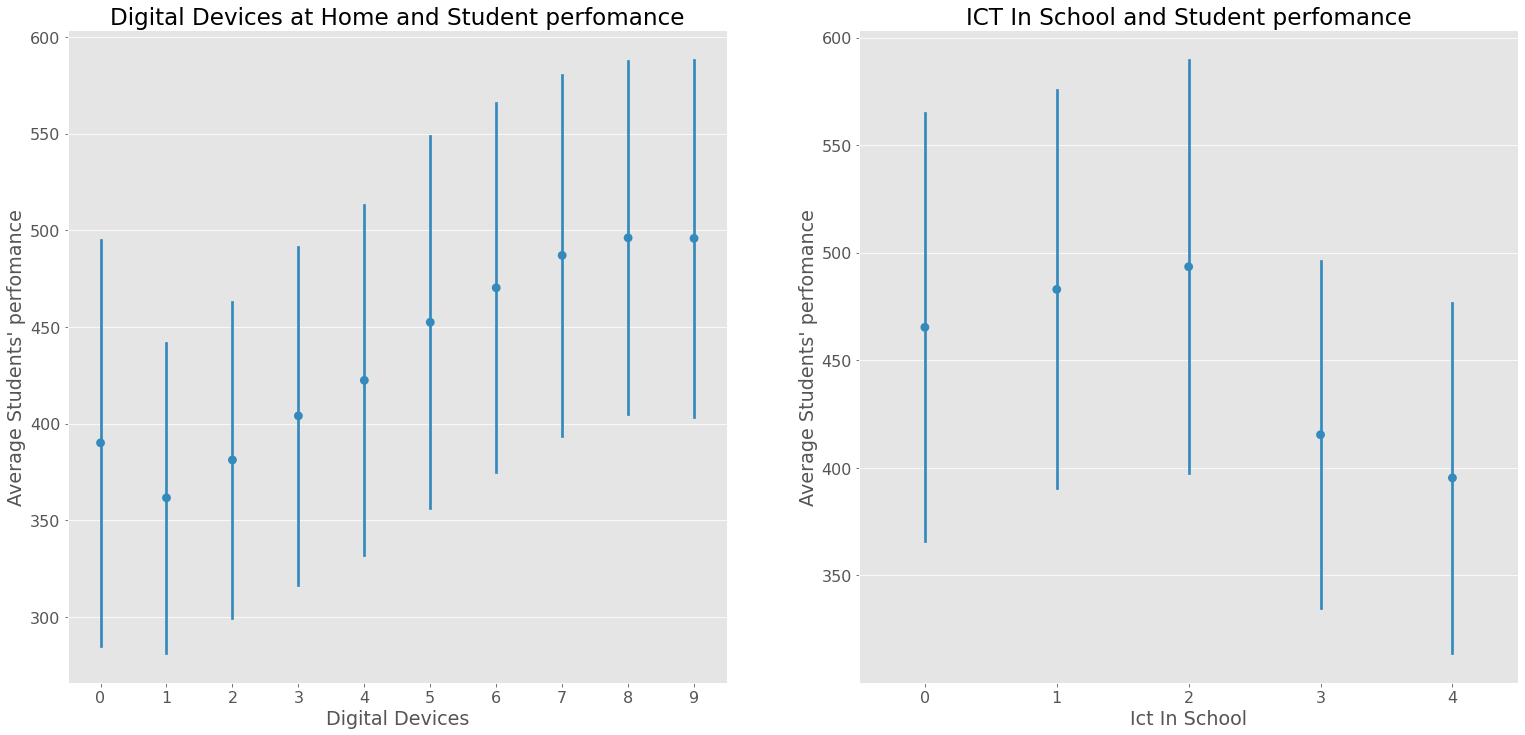

In [175]:
#Using the function above to create point plots digital devices at home with average perfomance and 
#ICT tools in school with average student perfomance
plt.figure(figsize=(26, 12))

plt.subplot(1, 2, 1)
points(pisa, 'digital_devices', 'average_perfomance', 'Digital Devices at Home and Student perfomance', "Average Students' perfomance")


plt.subplot(1, 2, 2)
points(pisa, 'ict_in_school', 'average_perfomance', 'ICT In School and Student perfomance', "Average Students' perfomance")


> Availabilty of digital devices at home is seen to have an influece o students' overal perfomance, As shown in the first graph above at the number of devices increase there is an increase in average perfomance of the students

> On the other hand we is seen that with an increase in ICT tools there is a drop in average perfomance of the students


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There was an intresting retionship between the minutes a student studies in a week and average perfomance. Its observed that the time a student studies a week does not really affect average perfomance. 

## Multivariate Exploration


### Does attitude toeads school Availability if digital devices affect Students' average perfomance

In [176]:

#Creating a function tco create a pont plot
def mult_points(df, xvalue, yvalue, hue, title, ylab):
    bs_cr = sb.color_palette()[1]
    sb.pointplot(data=df, x=xvalue, y=yvalue, ci='sd', linestyles="", hue=hue, dodge=0.4)  #ploting the polint plot
    plt.title(title)
    plt.ylabel(ylab)
    plt.xlabel(xvalue.replace('_', ' ').title())
    plt.legend(title= 'Attitude towards school does not affect perfomance') # Adding a legend and its title


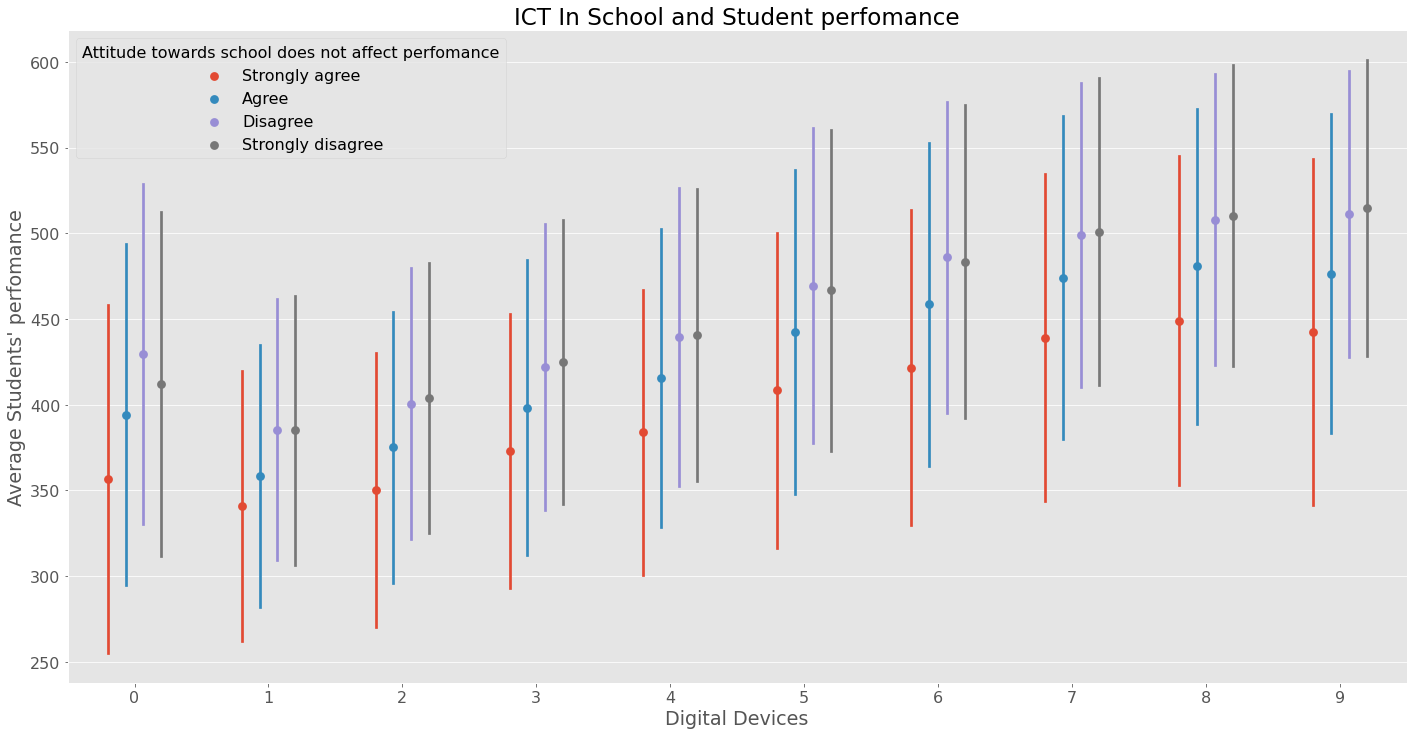

In [177]:
#Using the function above to create a pont plot
plt.figure(figsize=(24, 12))
mult_points(pisa, 'digital_devices', 'average_perfomance', 'attitude_towards_school', 'ICT In School and Student perfomance', "Average Students' perfomance")


> Its observed that as the number ofdigital devices increase in the house hold, the in as increase in student perfomance as well as student's attitude toeards school

## Is there a relationship between Minutes of reading per week and Average Perfomance by gender

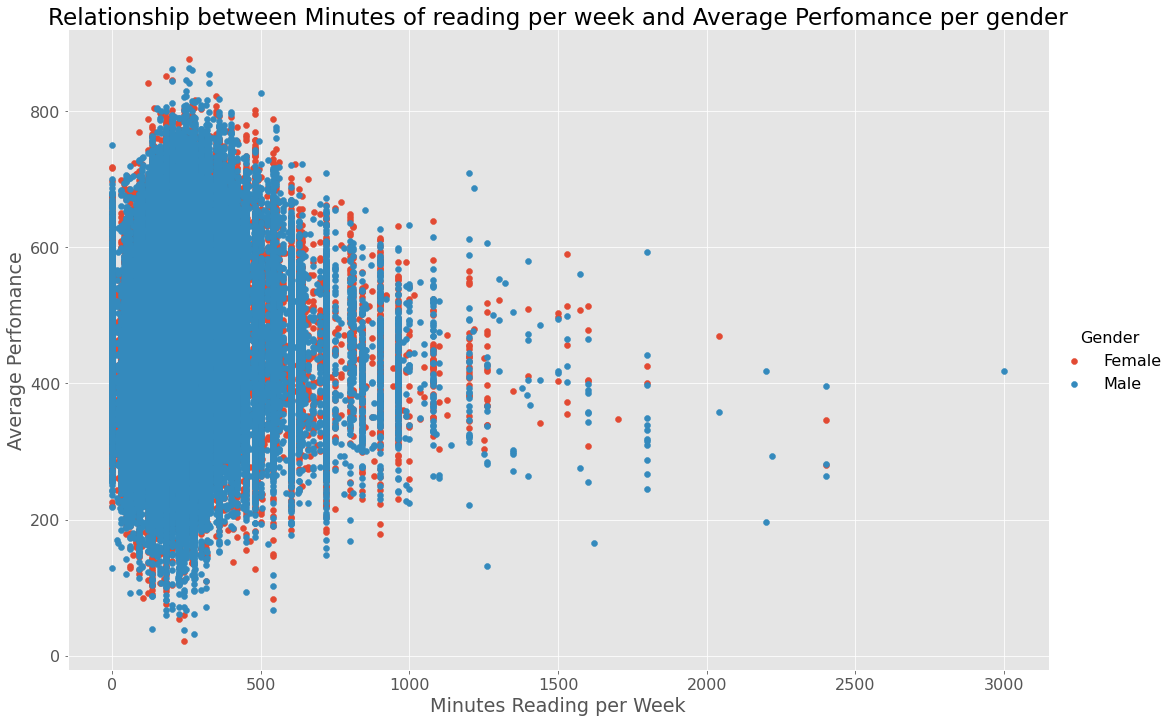

In [178]:
#Creating a function a scatterplot
def mult_scatter():
    x = sb.FacetGrid(data=pisa, hue='gender', height=10, aspect=1.5)
    x.map(plt.scatter, 'min_reading_per_week', 'average_perfomance')
    plt.title('Relationship between Minutes of reading per week and Average Perfomance per gender')
    x.set_xlabels('Minutes Reading per Week')
    x.set_ylabels('Average Perfomance')
    x.add_legend(title= 'Gender')

mult_scatter()

> Both Genders perform averagely between `250 to 650` and study between `0 to 500` hours minutes week.

> There is a week positive relationship between Minutes of reading in a week and Average Perfomance in both gendee

### Is there a relationship between average perfomance and attitude towaerds school by gender

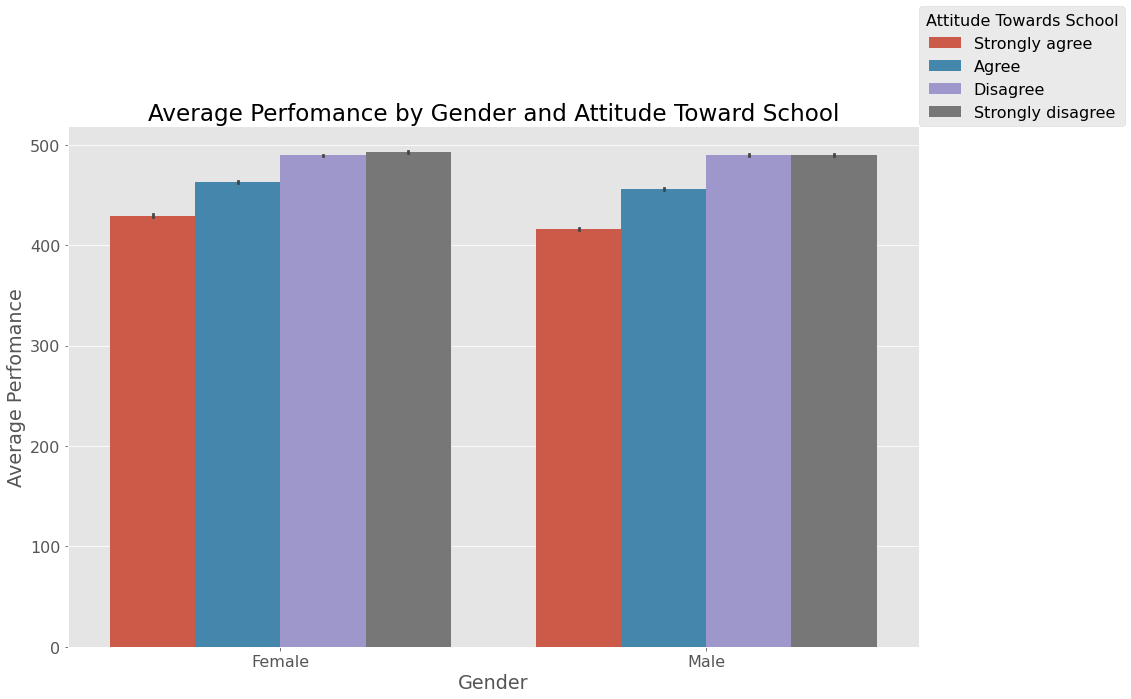

In [179]:
#creating a functio to plot a cluctered barchat 
def mult_clust():
    plt.figure(figsize=(16, 10))
    sb.barplot(data=pisa, x = 'gender', y= 'average_perfomance', hue='attitude_towards_school')
    plt.title('Average Perfomance by Gender and Attitude Toward School')
    plt.xlabel('Gender')
    plt.ylabel('Average Perfomance')
    plt.legend(title="Attitude Towards School", loc=(1, 1))  # creting a legend and placing it outside the plot
    plt.tight_layout()  # to fit both the legend and the graph in the layout/figure

mult_clust()

> For both male and female, those student who perfome well `disagree and strongly disagree` that attitude towards school does not contribute to student perfomance where as the ones who perform poorly `agree and strongly agree` that that attitude towards school does not contribute to student perfomance

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In both gender, the time of study does not seem to affetct the average perfomance

### Were there any interesting or surprising interactions between features?

> In both gender the student who perfom well strongly disagree abd disagree that Attitude towards education does not contribute to good perfomance

## Conclusions
> As the PISA (Programme for International Student Assessment) aims at evaluating education systems worldwide by testing the skills and knowledge of sudents. From the analysis it observed that most of the demographic and socioeconomic information about student influence student perfomance. PISA has ensured that there is ender Equality in terms of access to education, perfomace which is really great as gender equality is very importance more so in education. It has also been observed that there is inequality in accessing ICT tools in schools. ICT integration is vital as noted from the analysis, there is an increace in perfomance with an increase in access of digital devices and also this infuences postively the attitude towards school. So countries school introduce the use of ICT in schools as it influences the student attitude towards school and average perfomance. Teachers and parents should also motivate students to have a positive attitude toward school as affect student pwerfomance in both genders. Teacher classroom managemnet does not impact student perfomanc which may mean that the methodologies employed by teacher in classrooms should be reviewed, Teacher classroom managemnet should significantly relate to student's good perfomance. Parent level aof education also affect student perfomance as the more educated the parent is the higher education asipirations and attainment of the child.